In [5]:
import pandas as pd
import matplotlib.pylab as plt
import string                            #导入字符串模块

# 数据预处理

In [6]:
tab1 = "./hair_dryer.tsv"
print(tab1)

./hair_dryer.tsv


In [7]:
tab2 = "."

In [8]:
df_hd = pd.read_csv(tab1, sep='\t', header=0)

In [9]:
df_hd.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015


In [14]:
df_hd = df_hd[~(df_hd['vine'].str.contains("N") & df_hd['verified_purchase'].str.contains("N"))]
df_hd.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
5,US,51995766,R230LCPQDOFJJZ,B000065DJY,919751065,revlon 1875w volumizing hair dryer,Beauty,5,0,0,N,Y,Five Stars,Excellent dryer.,8/31/2015


In [15]:
df_hd.describe(include="all")

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
count,9989,9.989000e+03,9989,9989,9.989000e+03,9989,9989,9989.000000,9989.000000,9989.000000,9989,9989,9987,9989,9989
unique,1,NaN,9989,424,NaN,389,1,NaN,NaN,NaN,2,2,6586,9734,1993
top,US,NaN,R1IYJHTPJLRO57,B003V264WW,NaN,remington ac2015 t|studio salon collection pea...,Beauty,NaN,NaN,NaN,N,Y,Five Stars,good,8/5/2010
freq,9989,NaN,1,534,NaN,534,9989,NaN,NaN,NaN,9810,9811,1221,19,106
mean,NaN,2.792441e+07,NaN,NaN,4.806681e+08,NaN,NaN,4.188607,1.665632,1.990890,NaN,NaN,NaN,NaN,NaN
std,NaN,1.525756e+07,NaN,NaN,2.864728e+08,NaN,NaN,1.234705,12.476679,13.542958,NaN,NaN,NaN,NaN,NaN
min,NaN,1.246400e+04,NaN,NaN,4.239600e+05,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.478288e+07,NaN,NaN,2.261264e+08,NaN,NaN,4.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.663639e+07,NaN,NaN,4.867740e+08,NaN,NaN,5.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.217518e+07,NaN,NaN,7.322523e+08,NaN,NaN,5.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN


In [16]:
df_hd.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtype: object

In [17]:
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 11469
Data columns (total 15 columns):
marketplace          9989 non-null object
customer_id          9989 non-null int64
review_id            9989 non-null object
product_id           9989 non-null object
product_parent       9989 non-null int64
product_title        9989 non-null object
product_category     9989 non-null object
star_rating          9989 non-null int64
helpful_votes        9989 non-null int64
total_votes          9989 non-null int64
vine                 9989 non-null object
verified_purchase    9989 non-null object
review_headline      9987 non-null object
review_body          9989 non-null object
review_date          9989 non-null object
dtypes: int64(5), object(10)
memory usage: 1.2+ MB


## 按照 id 进行分组

### product_id

In [42]:
gp_pid = df_hd.groupby('product_id')

# 选特定的一组
print(gp_pid.get_group('B003V264WW')['star_rating'])

# 遍历
for item in gp_pid:
    print(item[0])
    print(item[1]['star_rating'])

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
B000050FDE
9745    3
Name: star_rating, dtype: int64
B000052YD1
10544    5
Name: star_rating, dtype: int64
B00005351F
10309    4
Name: star_rating, dtype: int64
B00005JG0H
10492    5
Name: star_rating, dtype: int64
B00005O0MZ
66       1
186      2
197      3
378      5
443      5
        ..
11397    5
11406    5
11446    2
11467    5
11469    3
Name: star_rating, Length: 360, dtype: int64
B00006498N
10367    4
Name: star_rating, dtype: int64
B00006598X
10376    5
Name: star_rating, dtype: int64
B000065DJY
5        5
55       2
157      3
313      5
327      5
        ..
9117     5
9195     4
9293     5
10098    5
10593    4
Name: star_rating, Length: 98, dtype: int64
B00006ANDK
10342    5
Name: star_rating, dtype: int64
B00006IV22
13       4
37       5
58       2
112      5
114      5
        ..
10438    5
10528    5
10703    4
10709    5
10950    5
Name: star_rating, Length: 183, dtype: int64
B00006IV46
9927    1
Name: star_rating

Name: star_rating, dtype: int64
B002F50FYE
10556    1
Name: star_rating, dtype: int64
B002GQMTAK
88      4
95      5
107     5
341     1
473     3
570     4
592     1
939     1
966     5
1446    1
2311    1
2467    1
2483    5
2514    1
3444    3
3735    5
3911    1
4000    5
4115    5
4300    1
4314    5
4332    5
4668    5
4685    2
4870    1
4871    5
5163    5
7119    5
7401    4
8042    2
Name: star_rating, dtype: int64
B002H6P0ZK
9708    5
Name: star_rating, dtype: int64
B002HMCIOK
9963    1
Name: star_rating, dtype: int64
B002HWS7UY
9724    5
Name: star_rating, dtype: int64
B002HZY6BK
9715    1
Name: star_rating, dtype: int64
B002I70P12
9726    4
Name: star_rating, dtype: int64
B002LIXTFC
9695     5
10111    4
10562    5
Name: star_rating, dtype: int64
B002LQBMIA
9366    5
Name: star_rating, dtype: int64
B002MHW4MG
475     5
685     5
740     5
940     4
1004    5
1031    5
1185    3
1355    5
1357    5
1482    5
1484    5
1688    3
2061    5
2740    5
2773    2
2883    4
3041  

### product_parent

In [50]:
gp_pp = df_hd.groupby('product_parent')

# # 选特定的一组
# print(gp_pp.get_group(732252283)['star_rating'])

# # 遍历
# for item in gp_pp:
#     print(item[0])
#     print(item[1]['star_rating'])

gp_pp[['star_rating', 'helpful_votes', 'total_votes']].mean()




,star_rating,helpful_votes,total_votes
product_parent,,,
423960,4.058824,0.500000,0.544118
12536427,5.000000,0.000000,0.000000
14552349,5.000000,3.000000,4.000000
16483457,4.466667,2.300000,2.683333
16983648,5.000000,0.000000,0.000000
...,...,...,...
987021536,4.052632,1.789474,2.263158
989462119,5.000000,20.000000,23.000000
992735618,5.000000,1.000000,2.000000


### product_title

In [48]:
gp_pt = df_hd.groupby('product_title')

# 选特定的一组
print(gp_pt.get_group('andis micro turbo hair dryer')['star_rating'])

# 遍历
for item in gp_pt:
    print(item[0])
    print(item[1]['star_rating'])

1        4
33       5
40       5
113      5
158      4
        ..
11215    4
11239    5
11248    2
11254    5
11258    5
Name: star_rating, Length: 211, dtype: int64
'Tween Time Instant Hair Color Touch Up Stick
10113    5
Name: star_rating, dtype: int64
(3 Pack) Ivory Caps **SUPER VALUE**- Maximum Potency Glutathione 1500 Skin Whitening Complex
10359    5
Name: star_rating, dtype: int64
100% Pure Organic Kids Vanilla Ice Cream Body Cream
9713    2
Name: star_rating, dtype: int64
130 BEST Blade Sampler FEATHER SHARK ASTRA NACET BIC LORD 7 O'Clock
10487    5
Name: star_rating, dtype: int64
2011 Australian Gold HellBent 10x Bronzer Tanning Lotion 11 oz.
9368    1
Name: star_rating, dtype: int64
30 Derby Extra Double Edge Razor Blades with Chromium-Ceramic-Platinum-Tungsten and Polymer Coated Edges (30 blades)
10323    5
Name: star_rating, dtype: int64
3M Medical & Surgical (n) Micropore Surgical Tape White 1 X 10 Yards Bx/12
10119    5
Name: star_rating, dtype: int64
5 Pairs Set of 10 To

7       3
18      5
25      5
31      4
36      5
       ..
8135    5
8326    4
8405    5
8689    5
9633    4
Name: star_rating, Length: 134, dtype: int64
conair sb1xr soft bonnet hair dryer 4 heat settings hot/warm/low/cool
2173    5
2824    5
2931    5
3098    4
Name: star_rating, dtype: int64
conair soft bonnet hair dryer 1 ea
27       2
155      3
236      4
340      3
427      3
        ..
11320    4
11345    5
11352    5
11362    4
11442    1
Name: star_rating, Length: 155, dtype: int64
conair the power of pink ionic hair dryer
875      5
2415     5
3566     1
4704     5
5480     2
6201     1
6207     5
7047     5
7464     5
8211     5
8453     2
9007     2
9215     5
9337     3
9494     1
9575     5
9912     5
9978     3
10070    5
10633    5
10894    5
10919    4
10967    5
Name: star_rating, dtype: int64
conair thermal shine 1875 watt hair dryer 1 ea
470      4
896      5
1213     5
1502     5
1522     5
1566     4
1610     5
1683     4
1771     4
2043     5
2080     5
2507   

# 文本分析

## 整体文本分析

### 读取文件，并分词

In [9]:
reviews = ''
for review in df_hd['review_body']:
    reviews = reviews + ' ' + review
hist = {}                                 #创建一个空字典，放词频与单词，无序排列
data = []                                 #创建一个空列表，放词频与单词，有序：从多到少
content = reviews.replace('-',' ')       #连字符—用空格代替
words = content.split()                   #字符串按空格分割--分词

### 保存全部评论 2 txt

In [10]:
# fw = open("./reviews.txt", 'w')    #将要输出保存的文件地址
# fw.write(reviews)

### 迭代处理：将字典变列表，存入数据

In [11]:
for i in range(len(words)):
    words[i] = words[i].strip(string.punctuation)  #去掉标点符号，去掉首尾
    words[i] = words[i].lower()                    #统一大小写
    if words[i] in hist:                          #统计词频与单词
        hist[words[i]] = hist[words[i]] + 1        #不是第一次
    else:
        hist[words[i]] = 1                         #第一次
# print(hist)

### 删除介词

In [12]:
excludes={"at","when", "was","one","had", "it's","than","would","the","and","of","you","a","with","but","as","be","in","or","are", "i", "it", "to", "hair","this", "is", "my", "dryer", "for", "that", "have"}
for word in excludes:
    if word in hist:
        del(hist[word])

### 遍历添加

In [13]:
for key, value in hist.items():                    #遍历字典
    temp = [value,key]                              #变量，变量值
    data.append(temp)                               #添加数据
data.sort(reverse=True)                            #排序

# for i in range(0,300):
#     print(data[i]) 

### 绘制直方图

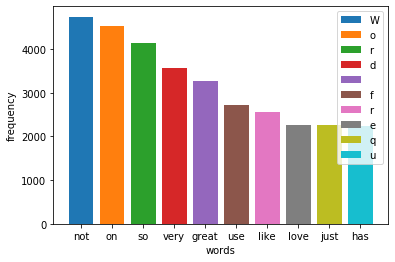

In [20]:
for i in range(0,10):
    plt.bar((data[i][1],),(data[i][0],))
plt.xlabel('words')                                   # 显示x轴名称
plt.ylabel('frequency')                                   # 显示y轴名称
plt.legend('Word frequency histogram')                             #显示图例
plt.show()                                            #显示作图结果


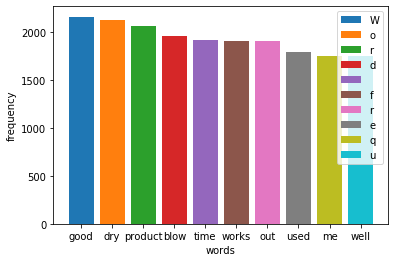

In [19]:
for i in range(10,20):
    plt.bar((data[i][1],),(data[i][0],))
plt.xlabel('words')                                   # 显示x轴名称
plt.ylabel('frequency')                                   # 显示y轴名称
plt.legend('Word frequency histogram')                             #显示图例
plt.show()    